### WCD data analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.mplot3d import Axes3D
import scipy
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import scipy.ndimage as ndimage
import re
import matplotlib.dates as md
import datetime as dt

from IPython.display import Image

# This ensures visualizations are plotted inside the notebook
%matplotlib inline

In [2]:
def smooth (data,win):
    
    N = len(data)
    step = (win-1)/2
    out = np.zeros(N)
    
    for j in range(step,N-step):
        valor = 0
        for k in range (-step,step + 1):
            valor = valor + data[j+k]

        out [j] = valor/win
    return out

In [3]:
# Loading the histogram
H1420 = np.loadtxt('His_14_21.dat')

# Histogram sorting
V = H1420[H1420[:,0].argsort()]

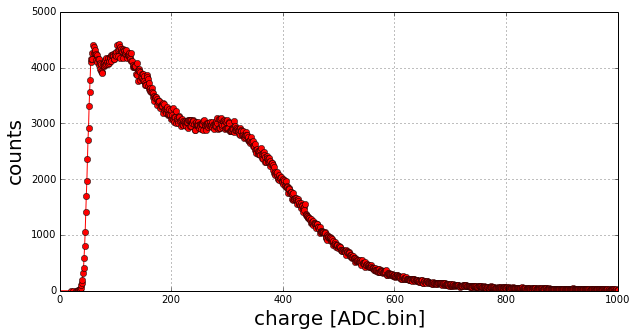

In [4]:
fig = plt.figure(figsize=(10, 5))
plt.plot(V[:,0],V[:,1], '-or')
plt.xlabel("charge [ADC.bin]", fontsize = 20)
plt.ylabel("counts", fontsize = 20)
plt.axis([0,1000,0,5000])
plt.grid()
plt.show()

### Gaussian fit

Here we fit a distribution function for describing the data behaviour. First a Gaussian, then a quadratic fucntion.

In [7]:
hVEM = 3000
hVEE = 4300

pMuons = scipy.optimize.curve_fit(lambda t,m,s: hVEM*np.exp((-(t-m)**2)/(2*(s**2))),  V[300:400,0],  V[300:400,1],  p0=(300, 100))
mmF = pMuons[0][0]
smF = pMuons[0][1]

pEP = scipy.optimize.curve_fit(lambda t,m,s: hVEE*np.exp((-(t-m)**2)/(2*(s**2))),  V[50:150,0],  V[50:150,1],  p0=(120, 20))
meF = pEP[0][0]
seF = pEP[0][1]

charge = np.linspace(0,600,101)


muons = hVEM*np.exp((-(charge-mmF)**2)/(2*smF**2))
ep = hVEE*np.exp((-(charge-meF)**2)/(2*seF**2))

print "mean muons= " + str(np.round(mmF,2))
print "standard deviation muons= " + str(np.round(smF,2))
print "mean e/p= " + str(np.round(meF,2))
print "standard deviation e/p= " + str(np.round(seF,2))

mean muons= 280.88
standard deviation muons= 128.89
mean e/p= 108.05
standard deviation e/p= 91.69


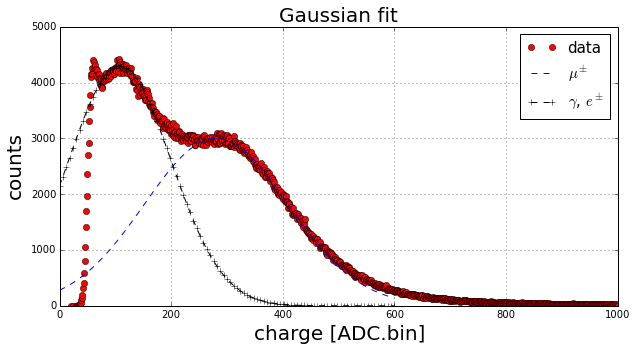

In [8]:
fig = plt.figure(figsize=(10, 5))
plt.plot(V[:,0],V[:,1], 'or',alpha=1)
plt.plot(charge, muons, '--b')
plt.plot(charge, ep, '--+k')
plt.xlabel("charge [ADC.bin]", fontsize = 20)
plt.ylabel("counts", fontsize = 20)
plt.legend(["data", "$\mu^\pm$","$\gamma$, $e^\pm$"], fontsize = 15)
plt.title("Gaussian fit", fontsize = 20)
plt.axis([0,1000,0,5000])
plt.grid()
plt.show()

### Quadratic fit

In [9]:
hVEM = 3000
hVEE = 4300

pMuons = scipy.optimize.curve_fit(lambda t,m,s: -s*(t-m)**2+ hVEM,  V[250:350,0],  V[250:350,1],  p0=(300,0.2))
mmF = pMuons[0][0]
smF = pMuons[0][1]

pEP = scipy.optimize.curve_fit(lambda t,m,s: -s*(t-m)**2+ hVEE,  V[50:150,0],  V[50:150,1],  p0=(120,1))
meF = pEP[0][0]
seF = pEP[0][1]

charge = np.linspace(0,600,101)


muons = -smF*(charge-300)**2 + hVEM
ep = -seF*(charge-110)**2 + hVEE

print "mean muons= " + str(np.round(mmF,2))
print "standard deviation muons= " + str(np.round(smF,2))
print "mean e/p= " + str(np.round(meF,2))
print "standard deviation e/p= " + str(np.round(seF,2))

mean muons= 277.41
standard deviation muons= 0.07
mean e/p= 107.65
standard deviation e/p= 0.23


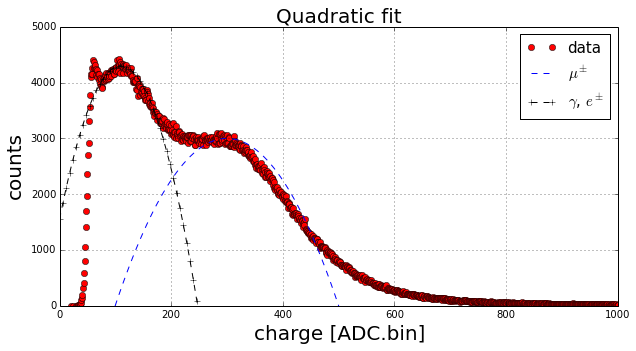

In [10]:
fig = plt.figure(figsize=(10, 5))
plt.plot(V[:,0],V[:,1], 'or')
plt.plot(charge, muons, '--b')
plt.plot(charge, ep, '--+k')
plt.xlabel("charge [ADC.bin]", fontsize = 20)
plt.ylabel("counts", fontsize = 20)
plt.legend(["data", "$\mu^\pm$","$\gamma$, $e^\pm$"], fontsize = 15)
plt.title("Quadratic fit", fontsize = 20)
plt.axis([0,1000,0,5000])
plt.grid()
plt.show()

### Datamining for determining new discrimination features

### Charge-Peak histogram (Muon-EM separation)

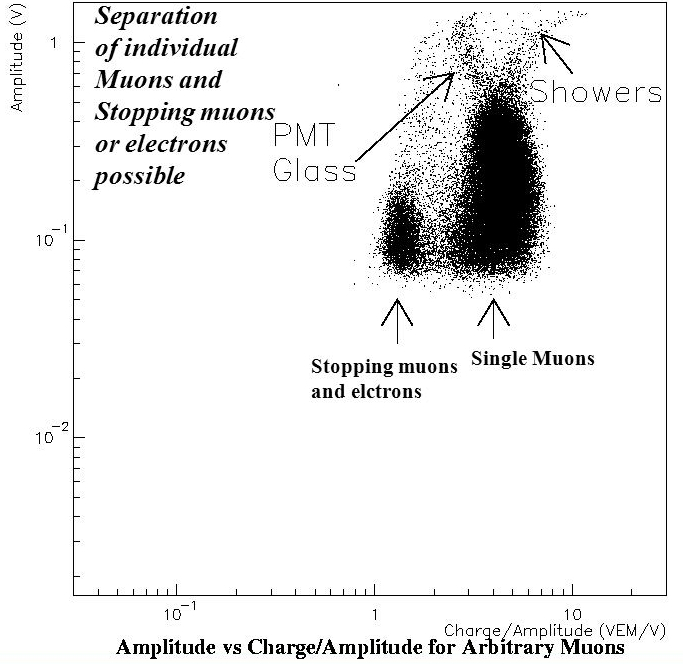

In [52]:
Image(filename='EM_Muon_Sep.jpg', width=500)

In [2]:
data = np.loadtxt("Charge_Peak_Ch2.dat")
charge = data[:,0]
peak = data[:,1]

<function matplotlib.pyplot.show>

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


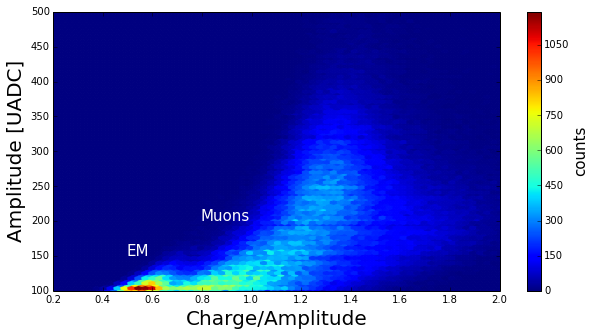

In [3]:
fig = plt.figure(figsize=(10, 5))
hb = plt.hexbin(charge/peak, peak, gridsize=200)
plt.xlabel("Charge/Amplitude", fontsize=20)
plt.ylabel("Amplitude [UADC]", fontsize=20)
plt.text(0.5,150,"EM", fontsize=15, color="white")
plt.text(0.8,200,"Muons", fontsize=15, color="white")
plt.axis([0.2,2,100,500])

cb = fig.colorbar(hb)
cb.set_label('counts', fontsize=15)

plt.show

### Angle calculation

In [15]:
theta = np.arctan((peak-50)/25.0)

<function matplotlib.pyplot.show>

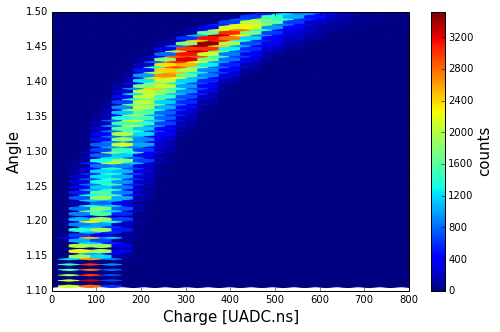

In [18]:
fig = plt.figure(figsize=(8, 5))
hb = plt.hexbin(charge, theta, gridsize=100)
plt.xlabel("Charge [UADC.ns]", fontsize=15)
plt.ylabel("Angle", fontsize=15)
plt.axis([0,800,1.1,1.5])

cb = fig.colorbar(hb)
cb.set_label('counts', fontsize=15)

plt.show

<function matplotlib.pyplot.show>

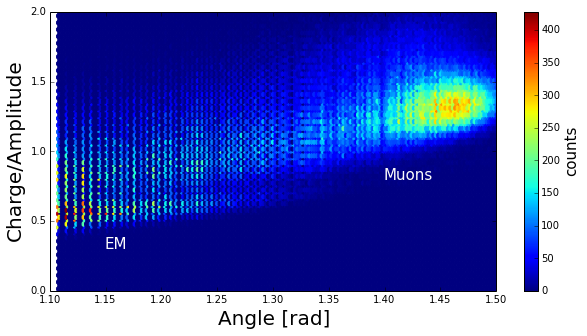

In [11]:
fig = plt.figure(figsize=(10, 5))
hb = plt.hexbin(theta, charge/peak, gridsize=200)
plt.xlabel("Angle [rad]", fontsize=20)
plt.ylabel("Charge/Amplitude", fontsize=20)
plt.text(1.15, 0.3,"EM", fontsize=15, color="white")
plt.text(1.4,0.8,"Muons", fontsize=15, color="white")
plt.axis([1.1,1.5, 0,2])

cb = fig.colorbar(hb)
cb.set_label('counts', fontsize=15)

plt.show

### A day-data analysis

Here we permorm the datamining for a day data

In [27]:
data = np.loadtxt("Charge_Peak_Ch2_2h.dat")
charge = data[:,0]
peak = data[:,1]

<function matplotlib.pyplot.show>

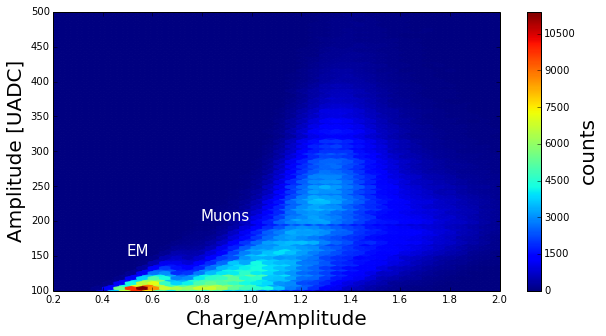

In [59]:
fig = plt.figure(figsize=(10, 5))
hb = plt.hexbin(charge/peak, peak, gridsize=200)
plt.xlabel("Charge/Amplitude", fontsize=20)
plt.ylabel("Amplitude [UADC]", fontsize=20)
plt.text(0.5,150,"EM", fontsize=15, color="white")
plt.text(0.8,200,"Muons", fontsize=15, color="white")
plt.axis([0.2,2,100,500])

cb = fig.colorbar(hb)
cb.set_label('counts', fontsize=20)

plt.show

In [29]:
theta = np.arctan((peak-50)/25.0)

<function matplotlib.pyplot.show>

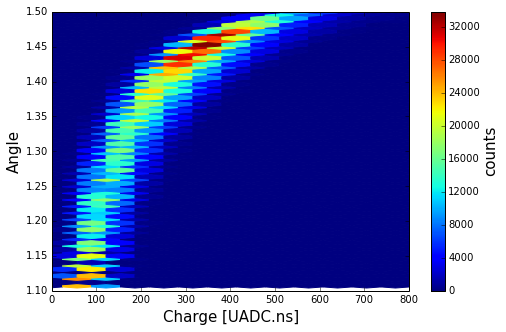

In [30]:
fig = plt.figure(figsize=(8, 5))
hb = plt.hexbin(charge, theta, gridsize=80)
plt.xlabel("Charge [UADC.ns]", fontsize=15)
plt.ylabel("Angle", fontsize=15)
plt.axis([0,800,1.1,1.5])

cb = fig.colorbar(hb)
cb.set_label('counts', fontsize=15)

plt.show

<function matplotlib.pyplot.show>

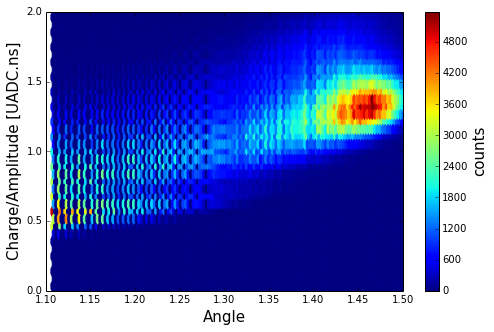

In [52]:
fig = plt.figure(figsize=(8, 5))
hb = plt.hexbin(theta, charge/peak, gridsize=150)
plt.xlabel("Angle", fontsize=15)
plt.ylabel("Charge/Amplitude [UADC.ns]", fontsize=15)
plt.axis([1.1,1.5, 0,2])

cb = fig.colorbar(hb)
cb.set_label('counts', fontsize=15)

plt.show